# Week 4: Intro to Statistics and Probability

In [ ]:
# pip install matplotlib_venn

In [44]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats
import random

## Day 2: Intro to probability
* **Probability** is the study of chance behavior
* Chance behavior is unpredictable in the short run, but has a regular and predictable pattern in the long run
* This is why we can use probability to gain useful results from random samples and randomized experiments
* In this context **relative frequency** (proportion of occurrences) of an outcome settles down to one value over the long run. That one value is then defined to be the **probability** of that outcome.
* Bottom line, if we perform an experiemnt many times and record the number of successful observations, then
\begin{equation} \text{probability} = \frac{\text{# successes}}{\text{# observations}} \end{equation}

### Example 1
* Visualize the relative frequencies of getting tails in the *experiment* tossing a fair coin (*fair* means equal chances of getting heads **H** or tails **T**). Then give an approximation of the probability $P(A)$, where $A$ is the *event* "**T** has been tossed"

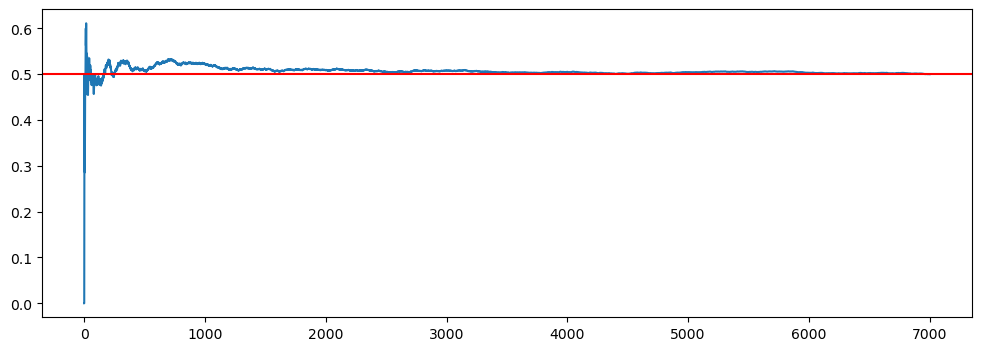

In [98]:
# 0 - heads, 1 - tails

# Number of simulations:
n = 7000

# Variables:
freq = np.zeros(n)
outcomes = np.zeros(n)

# Simulations:
for i in range(n):
    
    outcome = random.choice([0, 1])
    
    outcomes[i] = outcome
    
    freq[i] = sum(outcomes[:i]) / (i + 1)
    
#     print(f"---")
#     print(f"outcome = {outcome}")
#     print(f"outcomes = {outcomes}")
#     print(f"freq = {freq}")


# Outputs:
fig = plt.figure(figsize=(12, 4))

plt.plot(freq)
plt.axhline(y = 0.5, color = 'r', linestyle = '-') 

plt.show()

In [99]:
freq[-1]

0.5

In [101]:
len(outcomes[outcomes == 0])

3500

### Example 2
* Two fair six-sided dice are tossed. Using relative frequencies, estimate the probability $P(B)$ where $B$ is the event:
    * $B$: the sum of two outcomes is 5

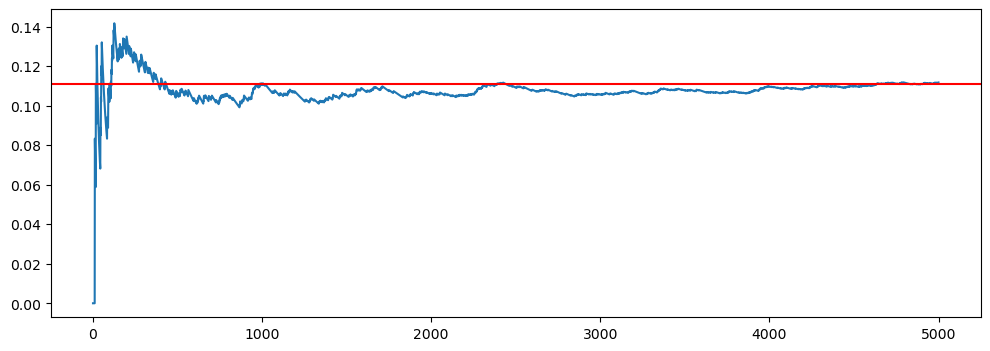

In [145]:
# 0 - the event B did not happen, 1 - the event B did happen

# Number of simulations:
n = 5000

# Variables:
freq = np.zeros(n)  # this is where the probabilities for each experiment are saved
outcomes = np.zeros(n)  # this is where the outcomes of each experiment are saved

# Simulations:
for i in range(n):
    
    dice_1 = random.choice([1, 2, 3, 4, 5, 6])
    dice_2 = random.choice([1, 2, 3, 4, 5, 6])
    
    outcome = 1 if dice_1 + dice_2 == 5 else 0
    
    outcomes[i] = outcome
    
    freq[i] = sum(outcomes[:i]) / (i + 1)

# Outputs:
fig = plt.figure(figsize=(12, 4))

plt.plot(freq)
plt.axhline(y = 4 / 36, color = 'r', linestyle = '-') 

plt.show()

In [146]:
freq[-1]

0.1118

In [147]:
4 / 36

0.1111111111111111

In [128]:
random.choice([1, 2, 3, 4, 5, 6])

6

### Basic probability rules
Note: The logical **or** corresponds to union operation for sets:
\begin{equation} A \cup B \quad\Leftrightarrow \quad A \text{ or } B \end{equation}

The logical **and** corresponds to intersection operation for sets:
\begin{equation} A \cap B \quad\Leftrightarrow \quad A \text{ and } B \end{equation}

We can think of events as subsets of the sample space, so we can visualize them by using Venn diagrams.

Let $A$ and $B$ be some events that can occur in some experiment, and let $S$ be the set of all possible outcomes ($S$ is called **sample space**). Here are the basic rules of probability:
* $0 \leqslant P(A) \leqslant 1$ for any event $A$
* $P(S) = 1$
* If two events $A$ and $B$ cannot happen in the same time, i.e. they are **disjoint** or **mutually exclusive**, then $P(A \cap B) = 0$ and
\begin{equation} P(A \cup B) = P(A) + P(B) \end{equation}
This is the *addition rule for disjoint events*
* In general, when the events $A$ and $B$ are not disjoint (are not mutually exclusive), then $P(A \cap B) \neq 0$ and:
\begin{equation} P(A \cup B) = P(A) + P(B) - P(A \cap B) \end{equation}
This is the *general addition rule*
* For any event $A$, the **complementary event** $A$ does not happen” is labeled by $A'$ and:
\begin{equation} P(A') = 1 - P(A) \end{equation}


### Example 3
Load the *student-mat.csv* data for this example. Details: [https://www.kaggle.com/uciml/student-alcohol-consumption#]

We randomly choose a student from the data set. Consider the following events:
* $A$: the student is female (look at feature *sex*)
* $B$: the student lives in an urban area (look at feature *address*)

Calculate the following probabilities: 
* $P(A)$ and $P(B)$
* $P(A \cap B)$ and $P(A \cup B)$

In [156]:
df = pd.read_csv('student-mat.csv')

P_A = df[df['sex'] == 'F'].shape[0] / df.shape[0]

P_A

0.5265822784810127

In [158]:
P_B = df[df['address'] == 'U'].shape[0] / df.shape[0]

P_B

0.7772151898734178

In [161]:
P_AaB = df[(df['sex'] == 'F') & (df['address'] == 'U')].shape[0] / df.shape[0]

P_AaB

0.4151898734177215

In [164]:
P_AuB = df[(df['sex'] == 'F') | (df['address'] == 'U')].shape[0] / df.shape[0]

P_AuB

0.8886075949367088

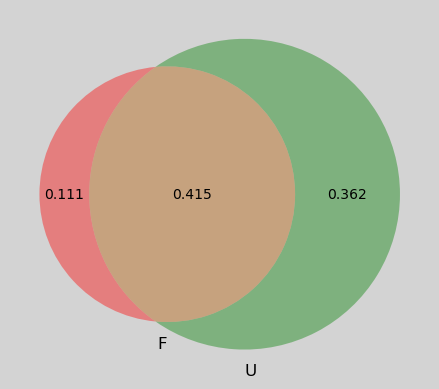

In [165]:
# Visualization time -- Venn Diagrams!
# Visualization time!
plt.figure(facecolor='lightgray')
venn2(subsets = np.round((P_A - P_AaB, P_B - P_AaB, P_AaB), 3),
      set_labels=['F', 'U'])
plt.show()

### Example 4
Consider the features *mjob* and *fjob* (mother and father job, respectively). Calculate the probability that for a randomly selected student:
* one parent is a teacher
* both parents are teachers
* neither parent is a teacher

In [169]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [172]:
# A := mother is a teacher
# B := father is a teacher
# A or B := one parent is a teacher
# A and B := both parents are teacher
# not A or not B := neither parent is a teacher

P_AuB = df[(df['Mjob'] == 'teacher') | (df['Fjob'] == 'teacher')].shape[0] / df.shape[0]

P_AuB

0.189873417721519

In [184]:
P_A = df[df['Mjob'] == 'teacher'].shape[0] / df.shape[0]

P_B = df[df['Fjob'] == 'teacher'].shape[0] / df.shape[0]

P_A, P_B

(0.1468354430379747, 0.07341772151898734)

In [175]:
P_AandB = df[(df['Mjob'] == 'teacher') & (df['Fjob'] == 'teacher')].shape[0] / df.shape[0]

P_AandB

0.030379746835443037

In [181]:
P_nAunB = df[(~(df['Mjob'] == 'teacher')) | (~(df['Fjob'] == 'teacher'))].shape[0] / df.shape[0]

P_nAunB

0.9696202531645569

In [183]:
P_nAunB = 1 - P_AandB

P_nAunB

0.9696202531645569

In [187]:
P_BothParentIsATeacher = P_AandB

P_NeitherParentIsATeacher = 1 - P_BothParentIsATeacher

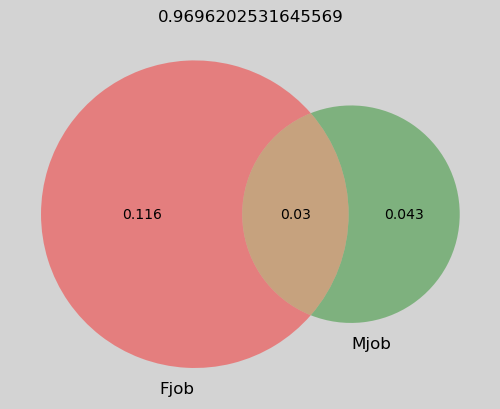

In [188]:
# Visualization time -- Venn Diagrams!
# Visualization time!
plt.figure(facecolor='lightgray')
plt.title(f'{P_NeitherParentIsATeacher}')
venn2(subsets = np.round((P_A - P_BothParentIsATeacher, P_B - P_BothParentIsATeacher, P_BothParentIsATeacher), 3),
      set_labels=['Fjob', 'Mjob'])
plt.show()

### Conditional Probability & Independent Events
If the occurrence of $A$ and $B$ are dependent on each other, then we can talk about the probability that **$A$ occurs given that $B$ has occurred**. This is the conditional probability of $A$ given $B$, labeled as $P(A \mid B)$. We calculate the conditional probability of $A$ given $B$ as:
\begin{equation} P(A \mid B) = \frac{P(A \cap B)}{P(B)} \end{equation}

Generally, $P(A) \neq P(A \mid B)$. In a case when $P(A) = P(A \mid B)$, then the occurence of $B$ does not influence the occurence of $A$, so we say that $A$ and $B$ are **independent events**. For independent events, it can also be shown that
\begin{equation} P(A \cap B) = P(A) \cdot P(B) \end{equation}

### Example 5
Let $C$ be the event "the student is engaged in romantic relationship", and let $D$ be the event "the student's study time is three or more hours weekly". Calculate the conditional probabilities:
* $P(C \mid D)$ and
* $P(D \mid C)$

In [198]:
# C := the student is engaged in romantic relationship -> the data for this are in the column romantic
# D := the student's study time is three or more hours weekly -> the data for this are in the column studytime

D = df[df['studytime'] >= 3]  # all observations in the set (event) D

CD = D[D['romantic'] == 'yes']

P_CD = CD.shape[0] / D.shape[0]

P_CD

0.3695652173913043

### Practice example
Let $M_h$ and $F_h$ be the events "the student's mother works in healthcare" and "student's father works in healthcare", respectively. Find the conditional probabilities:
* $P(M_h \mid F_h)$
* $P(F_h \mid M_h)$

In [206]:
# Mh := the student's mother works in healthcare
# Fh := the student's father works in healthcare

# probrability for the student's mother works in healthcare given that it is true that the student's father works in healthcare
# P(Mh | Fh) = P(Mh and Fh) / P(Fh)
P_Fh = df[df['Fjob'] == 'health'].shape[0] / df.shape[0]

P_Mh_and_Fh = df[(df['Fjob'] == 'health') & (df['Mjob'] == 'health')].shape[0] / df.shape[0]

P_Mh_given_Fh = P_Mh_and_Fh / P_Fh

# probrability for the student's father works in healthcare given that it is true that the student's mother works in healthcare
# P(Fh | Mh) = P(Fh and Mh) / P(Mh)
P_Mh = df[df['Mjob'] == 'health'].shape[0] / df.shape[0]

P_Fh_given_Mh = P_Mh_and_Fh / P_Mh

P_Mh_given_Fh, P_Fh_given_Mh

(0.3333333333333333, 0.1764705882352941)

In [214]:
students_father_works_in_healthcare = df[df['Fjob'] == 'health']

students_mother_and_father_work_in_healthcare = students_father_works_in_healthcare[students_father_works_in_healthcare['Mjob'] 
                                                                                    == 'health']

students_mother_and_father_work_in_healthcare

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
21,GP,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0,12,15,15
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,6,11,11,10
109,GP,F,16,U,LE3,T,4,4,health,health,...,5,4,5,1,1,4,4,14,15,16
169,GP,F,16,U,GT3,T,4,4,health,health,...,4,4,2,1,1,3,0,14,14,14
278,GP,F,18,U,GT3,T,4,4,health,health,...,2,4,4,1,1,4,15,9,8,8
303,GP,F,17,U,GT3,T,3,2,health,health,...,5,2,2,1,2,5,0,17,17,18


In [215]:
students_father_works_in_healthcare

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
21,GP,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0,12,15,15
24,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,9,8
38,GP,F,15,R,GT3,T,3,4,services,health,...,4,3,2,1,1,5,2,12,12,11
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,6,11,11,10
57,GP,M,15,U,GT3,T,4,4,teacher,health,...,3,2,2,1,1,5,4,14,15,15
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
89,GP,M,16,U,LE3,A,4,4,teacher,health,...,4,1,3,3,5,5,18,8,6,7
94,GP,M,15,U,LE3,T,2,2,services,health,...,4,3,4,1,1,4,6,11,13,14
105,GP,F,15,U,GT3,A,3,3,other,health,...,4,3,3,1,1,4,10,10,11,11


In [221]:
P_StudentsMotherWorksInHealthcare_GivenThatItIsTrue_StudentsFatherWorksInHealther = students_mother_and_father_work_in_healthcare.shape[0] / students_father_works_in_healthcare.shape[0]

P_StudentsMotherWorksInHealthcare_GivenThatItIsTrue_StudentsFatherWorksInHealther

0.3333333333333333

In [226]:
# probrability for the student's father works in healthcare given that it is true that the student's mother works in healthcare
# P(Fh | Mh) = P(Fh and Mh) / P(Mh)

studentsMotherWorksInHealthcare = df[df['Mjob'] == 'health']

studentsFatherANDMotherWorksInHealthcare = studentsMotherWorksInHealthcare[studentsMotherWorksInHealthcare['Fjob'] == 'health']

studentsFatherANDMotherWorksInHealthcare

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
21,GP,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0,12,15,15
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,6,11,11,10
109,GP,F,16,U,LE3,T,4,4,health,health,...,5,4,5,1,1,4,4,14,15,16
169,GP,F,16,U,GT3,T,4,4,health,health,...,4,4,2,1,1,3,0,14,14,14
278,GP,F,18,U,GT3,T,4,4,health,health,...,2,4,4,1,1,4,15,9,8,8
303,GP,F,17,U,GT3,T,3,2,health,health,...,5,2,2,1,2,5,0,17,17,18


In [228]:
P_Fh_given_Mh = studentsFatherANDMotherWorksInHealthcare.shape[0] / studentsMotherWorksInHealthcare.shape[0]

P_Fh_given_Mh

0.17647058823529413

### The Monty Hall Problem
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a **car**; behind the others, **goats**. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" [See Wikipedia for details](https://en.wikipedia.org/wiki/Monty_Hall_problem)

![Monty_Hall_problem](monty_hall.png)

*Is it to your advantage to switch your choice?*

Let us run a simulation to answer the question!

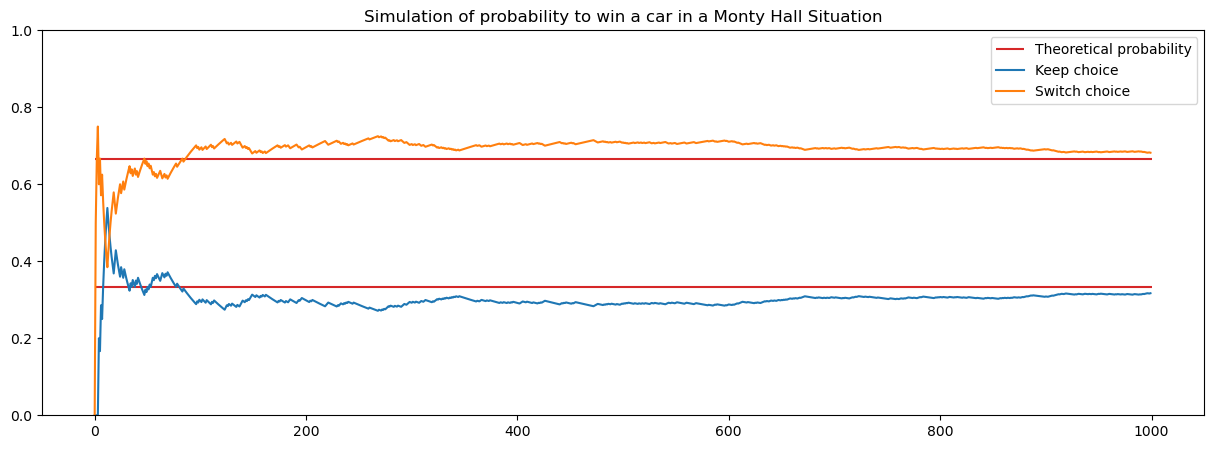

In [231]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
n = 1000

# Number of wins
wins_when_keep = np.zeros(n)
wins_when_switch = np.zeros(n)

# Frequencies
freq_keep = np.zeros(n)
freq_switch = np.zeros(n)

# We start simulating
for i in range(n):
    
    outcome = random.choice([1, 2, 3])
    
    if outcome == 1:
        wins_when_keep[i] = 1
    else:
        wins_when_switch[i] = 1
    
    freq_keep[i] = sum(wins_when_keep[:i]) / (i + 1)
    freq_switch[i] = sum(wins_when_switch[:i]) / (i + 1)
    
    

prob_keep = freq_keep[-1]
prob_switch = freq_switch[-1]
plt.figure(figsize=(15, 5))
plt.hlines([1/3, 2/3], xmin=0, xmax=n, colors = 'tab:red', label='Theoretical probability')
plt.plot(freq_keep, label='Keep choice')
plt.plot(freq_switch, label = 'Switch choice')
plt.ylim(0, 1)
plt.legend()
plt.title('Simulation of probability to win a car in a Monty Hall Situation')
plt.show()

In [236]:
P_positive = 0.97 * 0.04 + 0.08 * 0.96

P_L = 0.04

P_positive_given_L = 0.97 * 0.04

P_positive, P_L, P_positive_given_L

P_L_give_positive = (P_positive_given_L * P_positive) / P_L

P_L_give_positive

0.11213200000000001